# Train Landcover Network with Validation

In [1]:
from keras import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Dense, ReLU, Softmax, GlobalAveragePooling2D
from keras.optimizers import SGD
import scipy.io as sio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

sns.set_style("whitegrid")

2023-09-02 13:18:31.502636: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# To avoid: 
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized. 
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
satData = sio.loadmat("../data/satData.mat")
XTrain = satData["XTrain"]
XTest = satData["XTest"]
XVal = satData["XVal"]
YTrain = satData["YTrain"]
YTest = satData["YTest"]
YVal = satData["YVal"]

XTrain = XTrain.transpose([3, 0, 1, 2])
XTest = XTest.transpose([3, 0, 1, 2])
XVal = XVal.transpose([3, 0, 1, 2])
YTrain = YTrain.T
YTest = YTest.T
YVal = YVal.T

In [4]:
model = Sequential([InputLayer(input_shape=(28, 28, 4)), 
                    Conv2D(filters=20, kernel_size=(3, 3)), 
                    ReLU(), 
                    MaxPooling2D(pool_size=(3, 3), strides=(1, 1)), 
                    GlobalAveragePooling2D(),
                    Dense(units=6), 
                    Softmax()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 20)        740       
                                                                 
 re_lu (ReLU)                (None, 26, 26, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 20)       0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 20)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 126       
                                                                 
 softmax (Softmax)           (None, 6)                 0

2023-09-02 13:18:37.703344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-02 13:18:37.705322: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [5]:
optimizer = SGD(learning_rate=0.0001)
loss = tf.keras.losses.CategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy()
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Validation data can be a datastore, array, or a tuple. Because the images and labels for this data set are stored in two different variables, it is simplest to create a tuple.
A tuple of validation data should have two elements, where the first contains the images and the second contains the labels.

In [6]:
validation_data=(XVal, YVal)

We can set the "validation_data" option to turn on validation.
Because this network trains very quickly, you can also decrease the validation frequency so that the network is validated more often.

In [7]:
history = model.fit(XTrain, YTrain, epochs=25, batch_size=64, verbose="auto", validation_data=validation_data, validation_freq=1)

Epoch 1/25
47/47 [==============================] - 7s 105ms/step - loss: 19.9058 - categorical_accuracy: 0.3307 - val_loss: 22.4688 - val_categorical_accuracy: 0.4133
Epoch 2/25
47/47 [==============================] - 5s 107ms/step - loss: 11.5507 - categorical_accuracy: 0.4323 - val_loss: 8.8880 - val_categorical_accuracy: 0.5250
Epoch 3/25
47/47 [==============================] - 4s 94ms/step - loss: 8.3550 - categorical_accuracy: 0.5140 - val_loss: 2.8118 - val_categorical_accuracy: 0.6150
Epoch 4/25
47/47 [==============================] - 4s 95ms/step - loss: 7.1348 - categorical_accuracy: 0.5893 - val_loss: 11.7030 - val_categorical_accuracy: 0.4367
Epoch 5/25
47/47 [==============================] - 5s 101ms/step - loss: 6.1222 - categorical_accuracy: 0.5947 - val_loss: 9.7386 - val_categorical_accuracy: 0.5867
Epoch 6/25
47/47 [==============================] - 5s 97ms/step - loss: 5.9048 - categorical_accuracy: 0.6157 - val_loss: 1.9178 - val_categorical_accuracy: 0.7000
Epo

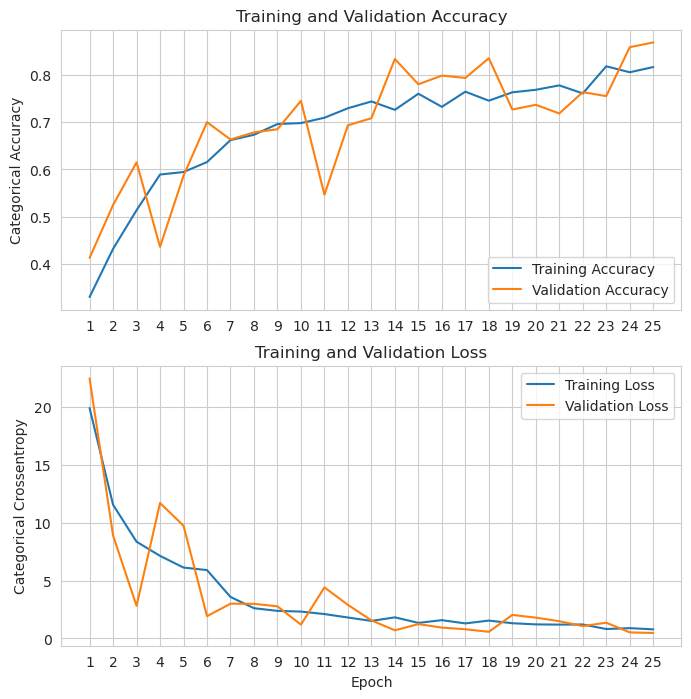

In [8]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Categorical Accuracy')
plt.title('Training and Validation Accuracy')
plt.xticks(range(len(acc)), range(1, len(acc)+1))

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Crossentropy')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.xticks(range(len(loss)), range(1, len(loss)+1))

plt.show()